## Load model

In [3]:
import gensim
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print('done')

done


## Unknown words mappings and clean_text function

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from nltk.tag import pos_tag
import nltk
from nltk.corpus import stopwords
# nltk.download()

TAG_REMOVE = re.compile(r'<[^>]+>')
mapping = [('twenti ','twentieth '),('thirti ','thirtieth '),('forti ','fortieth  '),('fifti ','fiftieth '),('sixti ','sixtieth '),('seventi ','seventieth '),('eighti ','eightieth '),('nineti ','ninetieth '),
           ('arrogancy ','arrogance '),('tortur ','torture '),('desirest','desire'),('desirest ','desire '),('desir ','desire '),('receivedst ','received '),('carri ','carries '),('forgiv ','forgives '),('divid ','divides '),
           ('athirst ','thirsty '),('testifi ','testifies '),('reprove ','reprove '),('grey ','gray '),('aveng ','avenge '),('behoov ','behoove '),('reprov ','reprove '),('affrighted ','frightened '),
           ('leathern ','leather '),('abhorr ','abhor '),('rejoic ','rejoice '),('provok ','provoke '),('straiten ','straighten '),('cumbered ','encumbered '),('suffic ','suffice '),('sware ','swore '),
           ('justifi ','justify '),('decre ','decree '),('ceas  ','cease '),('mingl ','mingle '),('persuad ','persuade '),('entic ','entice '),('trembl ','tremble '),('cimeter','scimitar'),
           ('condemneth','condemn'),('prophesi ','prophesy '),('awak ','awake '),('canst ','cannot '),('engraven','engraved'),('hadst ','had '),('rebell ','rebels '),('persecut ','persecute '),
           ('beginn ','begins '),('spilt','spilled'),('deni ','denies '),('consignation ','consignment '),('trampl ','trample '),('unstop ','unseal '),('suppos ','supposes '),('dispis ','despise '),
           ('stirr ','stirs '),('harv ','harvest '),('satisfi ','satisfies '),('advocateth ','advocates '),('manif ','manifest '),('hindereth ','hinder '),('forgett ','forget '),('reigneth ','reigns '),
           ('fainteth','faints '),('defence ','defense '),('hubl ','hubles '),('shouldst ','should '),('acknowledg ','acknowledges '),('meaneth ','means '),('comfortedst ','comforted '),('griev ','grieves '),
           ('methought ','I thought '),('invit ','invites '),('vainness ','vanity '),('shedd ','sheds '),('cleav ','cleaves '),('fulfil ','fulfill '),('choic ','well chosen '),('endur ','endures '),('smit ','smites '),
           ('allott ','allots '),('declar ','declares '),('sepulchre ','tomb '),('saidst ','said '),('Believ ','believe '),('Canst ','cannot '),('hindereth ','hinder '),('meaneth ','means '),('reigneth ','reigns ')]
# put everything to lowercase?

def clean_text(text): #removes punctuation, html tags, and pronouns that are not listed above
#     clean = TAG_REMOVE.sub('', text)
    clean = text.replace('<i>', '')
    clean = clean.replace('</i>','')
    clean = clean.lower()
    clean = " ".join(re.compile('\w+').findall(clean))
    if 'LORD' in clean:
        clean = clean.replace('LORD','lord')
    clean = " ".join(clean.split('eth '))
    clean = " ".join(clean.split('est '))
    for word in stopwords.words('english'):
        if word not in model:
            clean = clean.replace(' '+ word +' ', ' ')
    for k, v in mapping: #replace words that shouldn't have 'eth' or 'est' taken off
        clean = clean.replace(k, v)
    return clean

# bibles = pd.read_csv( 'bibles.csv' )
# bible_file = bibles[["Verse", "King James Bible"]]

# bible = {}
# #Example: bible['Matthew'][1][1] is Matthew 1:1
# for i in range(len(bible_file)):
#     book_chp_vrs = bible_file["Verse"][i].split()
#     book = " ".join(book_chp_vrs[:-1])
#     chap, verse = book_chp_vrs[-1].split(":")
#     chap = int(chap)
#     verse = int(verse)
#     text = bible_file["King James Bible"][i]
#     if book not in bible.keys():
#         if chap == 1 and verse == 1:
#             bible[book] = [[],['',clean_text(text)]] #insert clean text
#         else:
#             print("Error, not chapter 1")
#     else:
#         if len(bible[book]) == chap:
#             bible[book].append([clean_text(text)])
#         else:
            
#             bible[book][chap].append(clean_text(text)) #insert clean text 
            
# # for key in bible.keys():
# #     for chapter in bible[key]:
# #         for verse in chapter:
# #             print(verse)

# print("bible done")

## Put BoM into dictionary format

In [26]:
import re


def read_chapter(file, line, BoM):
    blank = next(file)
    line = next(file)
    while True: #Read each verse
        if line == 'THE END':
            break
        
        if chap_header_pattern.match(line):
            while not book_chp_vrs_pattern.match(line):
                line = next(file)
        book_chp_vrs = line.split()
        book = " ".join(book_chp_vrs[:-1])
        chap, verse = book_chp_vrs[-1].split(":")
        chap = int(chap)
        verse = int(verse)
        text = next(file).split()
        text = " ".join(text[1:])
        text = text.replace('\n','') + ' '
        line = text
        count = 0
        while True: #Read full text of verse
            count += 1
            line = next(file)
            if line == '\n':
                while not book_chp_vrs_pattern.match(line) and line != 'THE END':
                    line = next(file)
                break
            text += line.replace('\n', ' ')
            if count > 100:
                print("100 error")
                break
        #Put verse in dicionary
        if book not in BoM.keys():
            if chap == 1 and verse == 1:
                BoM[book] = [[],['',clean_text(text).split()]] #insert clean text
            else:
                print("Error, not chapter 1")
        else:
            if len(BoM[book]) == chap:
                BoM[book].append([clean_text(text).split()])
            else:
                BoM[book][chap].append(clean_text(text).split()) #insert clean text
            

pattern = re.compile("(Chapter \d+)")
book_chp_vrs_pattern = re.compile("(\d*( )*([A-Za-z]+ )*\d+:\d+)")
chap_header_pattern = re.compile("(\d*( )*([A-Za-z]+ )*\d+$)")

bom_file = open('book_of_mormon.txt')
BoM = {}
for line in bom_file:
    if pattern.match(line):
#         line, bom_file = read_chapter(bom_file, line)
        read_chapter(bom_file, line, BoM)
        
print("BoM done")

BoM done


## Convert BoM to vectors  

In [33]:
import copy

unknown_words = {''}
for key in BoM.keys():
    for chapter in range(len(BoM[key])):
        for verse in BoM[key][chapter]:
            for word in verse:
                if word not in model:
                    unknown_words.add(word)       
unknown_words.remove('')

# print(unknown_words)
# print(len(unknown_words))


def average_unknown_word(word_ind, vec_verse, verse):
    if word_ind - 2 < 0:
        begin = 0
    else:
        begin = word_ind - 2
    if word_ind + 2 > len(vec_verse):
        end = len(vec_verse)
    else:
        end = word_ind + 2
    numVerses = 0
    vec = np.zeros((300,))
    for word in range(begin,end):
        if verse[word] in model:
            vec += model[verse[word]]
#         if type(vec_verse[word]) != type('str'):
#             vec += vec_verse[word]
            numVerses += 1
    if numVerses != 0:
        vec /= numVerses
    else:
#         print("zero error")
        print(key + ' ' + str(chapter), end=" ")
        for word in verse:
            print(word, end=" ")
        print('\n')
    if not vec.any():
        print(verse[word_ind])
        return verse[word_ind]
    return vec

vec_BoM = copy.deepcopy(BoM)

for key in BoM.keys():
    for chapter in range(1,len(BoM[key])):
        for verse in range(1,len(BoM[key][chapter])):
            for word in range(0,len(BoM[key][chapter][verse])):
                cur_word = BoM[key][chapter][verse][word]
                if cur_word not in unknown_words:
                    vec_BoM[key][chapter][verse][word] = model[cur_word]

for key in BoM.keys():
    for chapter in range(1,len(BoM[key])):
        for verse in range(1,len(BoM[key][chapter])):
            for word in range(0,len(BoM[key][chapter][verse])):
                cur_word = BoM[key][chapter][verse][word]
                if cur_word in unknown_words:
                    vec_BoM[key][chapter][verse][word] = average_unknown_word(word, vec_BoM[key][chapter][verse], BoM[key][chapter][verse])
print("done")

2 Nephi 19 manasseh ephraim ephraim manasseh they together shall be against judah for all this his anger is not turned away but his hand is stretched out still 

manasseh
2 Nephi 19 manasseh ephraim ephraim manasseh they together shall be against judah for all this his anger is not turned away but his hand is stretched out still 

ephraim
2 Nephi 19 manasseh ephraim ephraim manasseh they together shall be against judah for all this his anger is not turned away but his hand is stretched out still 

ephraim
Jacob 1 now the people which were not lamanites were nephites nevertheless they were called nephites jacobites josephites zoramites lamanites lemuelites ishmaelites 

josephites
Jacob 1 now the people which were not lamanites were nephites nevertheless they were called nephites jacobites josephites zoramites lamanites lemuelites ishmaelites 

zoramites
Jacob 1 now the people which were not lamanites were nephites nevertheless they were called nephites jacobites josephites zoramites la

3 Nephi 1 and nephi the son helaman had departed out the land zarahemla giving charge unto his son nephi who was his eld son concerning the plates brass all the records which had been kept all those things which had been kept sacred from the departure lehi out jerusalem 

and
3 Nephi 2 and nephi who was the father nephi who had the charge the records did not return the land zarahemla could nowhere be found in all the land 

and
3 Nephi 11 and nephi arose went forth bowed himself before the lord did kiss his feet 

and
3 Nephi 19 and it came pass that on the morrow when the multitude was gathered together behold nephi his brother whom he had raised from the dead whose name was timothy also his son whose name was jonas also mathoni mathonihah his brother kumen kumenonhi jeremiah shemnon jonas zedekiah isaiah now these were the names the disciples whom jesus had chosen it came pass that they went forth stood in the midst the multitude 

jeremiah
4 Nephi 1 and it came pass that in this yea

In [76]:
for key in BoM.keys():
    for chapter in range(1,len(BoM[key])):
        for verse in range(1,len(BoM[key][chapter])):
            for word in range(1,len(BoM[key][chapter][verse])):
                cur_word = BoM[key][chapter][verse][word]
                if cur_word in unknown_words:
                    if vec_BoM[key][chapter][verse][word][0] == 0 and vec_BoM[key][chapter][verse][word][1] == 0:
                        print(vec_BoM[key][chapter][verse][word])
                        print(BoM[key][chapter][verse][word])
                        
#                     if model[cur_word][0] != vec_BoM[key][chapter][verse][word][0]:
#                         print(key + str(chapter) + str(verse) + cur_word)
print('done')

# print(vec_BoM['1 Nephi'][14][2][0])
# print(vec_BoM['1 Nephi'][14][2][1])
# print(vec_BoM['1 Nephi'][14][2][2])
# print(model['and'])

done


In [27]:
unknown_words = {''}
for key in BoM.keys():
    for chapter in range(len(BoM[key])):
        for verse in BoM[key][chapter]:
            for word in verse:
                if word not in model:
#                     if word.istitle():
#                     if word.endswith('eth') or word.endswith('eth ') or word.endswith('est') or word.endswith('est ') and not word.istitle():
                    unknown_words.add(word)       
unknown_words.remove('')

print(unknown_words)
print(len(unknown_words))

# for key in BoM.keys():
#     for chapter in range(1,len(BoM[key])):
#         for verse in range(1,len(BoM[key][chapter])):
#             for word in range(1,len(BoM[key][chapter][verse])):
#                 cur_word = BoM[key][chapter][verse][word]
#                 if type(vec_BoM[key][chapter][verse][word]) != type(model['word']):
#                     print(vec_BoM[key][chapter][verse][word])
# print('done')

{'incorruption', 'moroni', 'groanings', 'quarrelings', 'pekah', 'onidah', 'humbl', 'madmenah', 'amnigaddah', 'wilfully', 'samaria', 'tarshish', 'palestina', 'kishkumen', 'amalickiah', 'corianton', 'shearjashub', 'besom', 'firstlings', 'shemlon', 'gideon', 'ahaz', 'gebim', 'teasings', 'reigneth', 'aiath', 'jehovah', 'limnah', 'zoramite', 'lamoni', 'fatlings', 'privily', 'onti', 'gomorrah', 'zarahemla', 'akish', 'limhah', 'ezrom', 'cureloms', 'lemuel', 'sheum', 'shum', 'shelem', 'teomner', 'cauls', 'and', 'helam', 'ishmaelites', 'lyings', 'ammonihah', 'rahab', 'shemnon', 'emron', 'shiblon', 'sariah', 'jacom', 'antipas', 'amulek', 'kumen', 'archeantus', 'sobbings', 'onihah', 'sebus', 'shinar', 'amulon', 'nimrah', 'abinadom', 'ramah', 'melek', 'revilings', 'enticings', 'whoredoms', 'gilead', 'antionum', 'comnor', 'ablom', 'delightsome', 'hinderment', 'hindereth', 'shiblom', 'ziff', 'gidgiddonah', 'antiparah', 'seezoram', 'tubaloth', 'zechariah', 'mosiah', 'bibber', 'antiomno', 'grievousnes

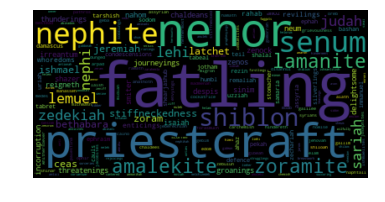

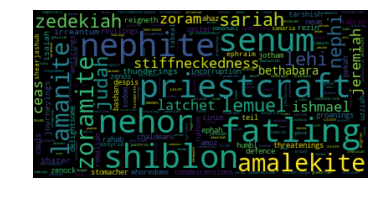

In [29]:
import matplotlib.pyplot as plt

unknown_map = {}
for key in BoM.keys():
    for chapter in range(len(BoM[key])):
        for verse in BoM[key][chapter]:
            for word in verse:
                if word in unknown_words:
                    if word in unknown_map.keys():
                        unknown_map[word] += 1
                    else:
                        unknown_map[word] = 1

from os import path
from wordcloud import WordCloud

# d = path.dirname(__file__)

# Read the whole text.
file = open('unknown_words.txt','w')
for item in unknown_map.keys():
    file.write("%s\n" % item)
file.close()

text = open('unknown_words.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("word_cloud.png", dpi=150)

In [1]:
# import multiprocessing
# from gensim.corpora.wikicorpus import WikiCorpus
# from gensim.models.word2vec import Word2Vec
# from gensim.models import word2vec
# from nltk.corpus import gutenberg
# from string import punctuation


# sents = gutenberg.sents('bible-kjv.txt')
# for file in gutenberg.fileids():
#     if file != 'bible-kjv.txt':
#         sents += gutenberg.sents(file)

# # for sent in sents:
# #     print(sent)

# # print(len(bible_kjv_sents))
# # print(len(sents))

# discard_punctuation_and_lowercased_sents = [[word.lower() for word in sent if word not in punctuation] for sent in sents]
# # # bible_model = word2vec.Word2Vec(discard_punctuation_and_lowercased_sents, min_count=5, size=300)

# print('bible done')
# wiki = WikiCorpus('data/sw/swwiki-latest-pages-articles.xml.bz2', 
#                   lemmatize=False, dictionary={})
# sentences = list(wiki.get_texts())
# sents = sentences + discard_punctuation_and_lowercased_sents
# print('len')
# print(len(sents))
# params = {'size': 300, 'window': 10, 'min_count': 10, 
#           'workers': max(1, multiprocessing.cpu_count() - 1), 'sample': 1E-3,}
# wiki_model = Word2Vec(sents, **params).wv
# print('done')

bible done
len
120697
done


In [ ]:
# skip own verse

# pick a verse. Calculate angle to all other verses. Display top k verses.

# add up angle of each of the k verses, divide by k. Output this average angle as a score.

# add all average angles, using each verse as the comparison verse, to a vector. Find the min and max of that vector 
# as the most similar and least similar of verse to the outputted k verses

In [102]:
# from operator import itemgetter
from heapq import heappush, heappop, heapify

class topVerse(object):
    def __init__(self,angle,verse): 
        self.angle = angle
        self.verse = verse
    def __lt__(self,other): return self.angle > other.angle
    def __eq__(self,other): return self.angle == other.angle
    def __str__(self): return "Angle: " + str(self.angle) + "\t Verse: " + self.verse

def vectorize_verse(verse):
    vec = np.zeros((300,))
    for word in verse:
        if type(word) != type('str'):
            vec += word
#         else:
#             return 'Non-vectorized verse'
    if type(vec) == type(''):
        print(vec)
    return vec

def unit_vector(vector):
    #Returns the unit vector of the vector.
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    #Returns the angle in radians between vectors 'v1' and 'v2'
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def compare_to_all_verses(comp_verse, scores, k, comp_verse_str):
    topK = [topVerse(7,'') for i in range(k)] #list ofk  tuples. 
    heapify(topK)
#     print(heappop(topK))
#     heappush(topK, topVerse(20,''))

    for key in vec_BoM.keys():
        for chapter in range(1,len(vec_BoM[key])):
            for verse in range(1,len(vec_BoM[key][chapter])):
                cur_verse = vectorize_verse(vec_BoM[key][chapter][verse])
                cur = cur_verse.all()
                comp = comp_verse.all()
                if cur_verse.all() == comp_verse.all():
                    continue
                angle = angle_between(comp_verse, cur_verse)
                if angle < topK[0].angle:
                    verse_str = key + " " + str(chapter) + ":" + str(verse)
                    heappop(topK)
                    heappush(topK, topVerse(angle, verse_str))
    norm = 0
    for top in topK:
        norm += top.angle
    norm /= k
    scores.append((norm,comp_verse_str,topK))
    return scores

# comp_verse = '1 Nephi 1:1'
# book_chp_vrs = comp_verse.split()
# book = " ".join(book_chp_vrs[:-1])
# chap, verse = book_chp_vrs[-1].split(":")
# chap = int(chap)
# verse = int(verse)
# comp_verse = vec_BoM[book][chap][verse]
# comp_verse = vectorize_verse(comp_verse)


# scores = list()
# scores = compare_to_all_verses(comp_verse, scores, 10)

# for score in scores:
#     print(score[0])
#     for top in score[1]:
#         print(top)
#     print()

scores = list()
k = 10
for key in vec_BoM.keys():
    print(key)
    for chapter in range(1,len(vec_BoM[key])):
        print(chapter)
        for verse in range(1,len(vec_BoM[key][chapter])):
            comp_verse = vectorize_verse(vec_BoM[key][chapter][verse])
            comp_verse_str = key + " " + str(chapter) + ":" + str(verse)
            scores = compare_to_all_verses(comp_verse, scores, k, comp_verse_str)
            
print('done')

1 Nephi
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
2 Nephi
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
Jacob
1
2
3
4
5
6
7
Enos
1
Jarom
1
Omni
1
Words of Mormon
1
Mosiah
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Alma
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


KeyboardInterrupt: 

In [109]:
for score in scores:
    if score[0] < .45:
        print(score[1], score[0])
        for top in score[2]:
            print(top)
        print()

2 Nephi 33:1 0.44109224692963417
Angle: 0.45154397976487554	 Verse: Mosiah 3:14
Angle: 0.4483360455029099	 Verse: Jacob 4:13
Angle: 0.44215241630187846	 Verse: Jacob 2:20
Angle: 0.44451647334459543	 Verse: Jacob 4:12
Angle: 0.4409708255925109	 Verse: Alma 32:4
Angle: 0.43916630171821025	 Verse: Jacob 3:4
Angle: 0.43720858528814627	 Verse: Jacob 6:3
Angle: 0.43043027418951235	 Verse: 1 Nephi 1:20
Angle: 0.4360024999953745	 Verse: 1 Nephi 13:28
Angle: 0.44059506759832817	 Verse: Mosiah 2:40

Mosiah 21:13 0.4207943625287104
Angle: 0.4286124020439197	 Verse: Alma 56:55
Angle: 0.4282680549097047	 Verse: Mosiah 29:19
Angle: 0.4278654617208079	 Verse: 1 Nephi 7:20
Angle: 0.42611801847435243	 Verse: 1 Nephi 8:36
Angle: 0.4225445847576003	 Verse: 3 Nephi 3:24
Angle: 0.4242184519380263	 Verse: Alma 36:1
Angle: 0.4150581127296468	 Verse: 1 Nephi 16:38
Angle: 0.41560842082688687	 Verse: 2 Nephi 5:20
Angle: 0.4191792441666415	 Verse: 1 Nephi 1:20
Angle: 0.40047087371951806	 Verse: Mormon 3:2

Alma 

In [106]:
print(min(scores,key=lambda item:item[0])[0])

0.4207943625287104


In [113]:
low = 7
vrs = ''
comp = ''
high = 0
for score in scores:
    if score[0] < .45:
        print(score[1], score[0])
        for top in score[2]:
            if top.angle < low:
                low = top.angle
                vrs = top.verse
                comp = score[1]
                print(top)
            if top.angle > high:
                high = top.angle
        print()

print(low)
print(vrs)
print(comp)
print("high:",high)

2 Nephi 33:1 0.44109224692963417
Angle: 0.45154397976487554	 Verse: Mosiah 3:14
Angle: 0.4483360455029099	 Verse: Jacob 4:13
Angle: 0.44215241630187846	 Verse: Jacob 2:20
Angle: 0.4409708255925109	 Verse: Alma 32:4
Angle: 0.43916630171821025	 Verse: Jacob 3:4
Angle: 0.43720858528814627	 Verse: Jacob 6:3
Angle: 0.43043027418951235	 Verse: 1 Nephi 1:20

Mosiah 21:13 0.4207943625287104
Angle: 0.4286124020439197	 Verse: Alma 56:55
Angle: 0.4282680549097047	 Verse: Mosiah 29:19
Angle: 0.4278654617208079	 Verse: 1 Nephi 7:20
Angle: 0.42611801847435243	 Verse: 1 Nephi 8:36
Angle: 0.4225445847576003	 Verse: 3 Nephi 3:24
Angle: 0.4150581127296468	 Verse: 1 Nephi 16:38
Angle: 0.40047087371951806	 Verse: Mormon 3:2

Alma 5:10 0.42809385292987506
Angle: 0.3705826933424909	 Verse: 1 Nephi 2:15

0.3705826933424909
1 Nephi 2:15
Alma 5:10
high: 0.45154397976487554
